<a href="https://colab.research.google.com/github/petrusthelastking/TANDANG_GAWE_KUIS_ULO-PYTHON-/blob/main/JS06_ANN_(Approximate_Nearest_Neighbors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalasi Library

In [ ]:
!pip install annoy
!pip install faiss-cpu
#!pip install faiss-gpu
!pip install hnswlib
!pip -q install faiss-cpu annoy hnswlib scikit-learn kagglehub pandas


## PRAKTIKUM 1

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 8.6384 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak: [np.float64(0.0), np.float64(13.237907813420613), np.float64(54.73661775436655)]
Waktu Annoy: 0.1435 ms


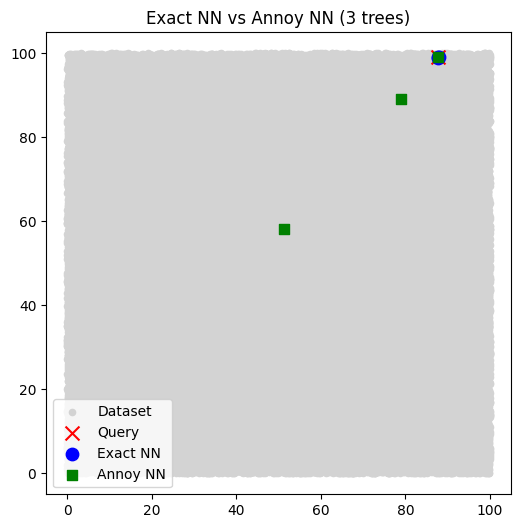

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000  # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")


Exact NN result: [ 95391 696514 348969 718457 987947]
Exact NN time: 0.127 seconds
Annoy result: [696514, 316514, 749994, 966717, 598118]
Annoy time: 0.0 seconds


## PRAKTIKUM 2


--- Experiment: n_points=1000, dim=2, metric=L2 ---
Exact NN (Flat) indices: [[112 535 777]]
Exact NN distances: [[2.1161813e-05 1.3761134e-03 2.3510854e-03]]
Waktu Exact: 0.00015497207641601562
IVF+PQ indices: [[112 535 777]]
IVF+PQ distances: [[1.6702339e-05 1.3291128e-03 2.3584329e-03]]
Waktu IVF+PQ: 4.9114227294921875e-05


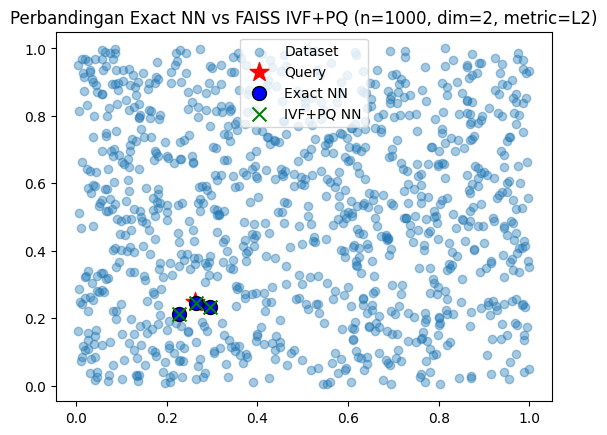


--- Experiment: n_points=1000, dim=2, metric=IP ---
Exact NN (Flat) indices: [[249 712 598]]
Exact NN distances: [[0.49857783 0.4965706  0.49405992]]
Waktu Exact: 4.601478576660156e-05
IVF+PQ indices: [[112 535 777]]
IVF+PQ distances: [[1.6702339e-05 1.3291128e-03 2.3584329e-03]]
Waktu IVF+PQ: 5.173683166503906e-05


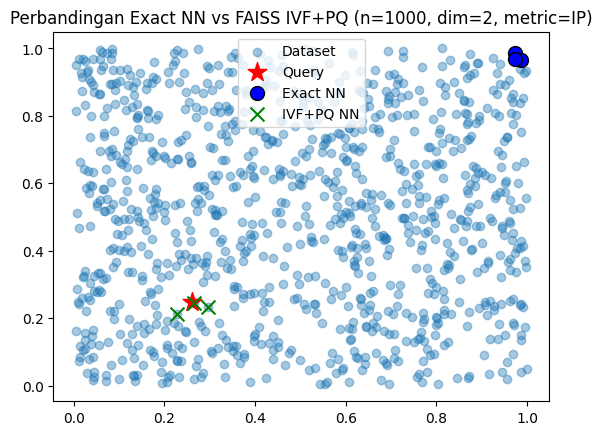


--- Experiment: n_points=1000, dim=5, metric=L2 ---
Exact NN (Flat) indices: [[988 780  27]]
Exact NN distances: [[0.01057143 0.0225298  0.04096785]]
Waktu Exact: 6.270408630371094e-05
IVF+PQ indices: [[988 780  27]]
IVF+PQ distances: [[0.01058318 0.0225963  0.04078479]]
Waktu IVF+PQ: 7.987022399902344e-05

--- Experiment: n_points=1000, dim=5, metric=IP ---
Exact NN (Flat) indices: [[210 106  49]]
Exact NN distances: [[2.536652  2.5025609 2.4636436]]
Waktu Exact: 2.7894973754882812e-05
IVF+PQ indices: [[988 780  27]]
IVF+PQ distances: [[0.01058318 0.0225963  0.04078479]]
Waktu IVF+PQ: 6.866455078125e-05

--- Experiment: n_points=1000000, dim=2, metric=L2 ---
Exact NN (Flat) indices: [[132774 119034 511191]]
Exact NN distances: [[1.2678578e-07 3.3845731e-07 4.1168511e-07]]
Waktu Exact: 0.005404472351074219
IVF+PQ indices: [[119034 132774 410129]]
IVF+PQ distances: [[1.6437843e-07 2.5378540e-07 2.5378540e-07]]
Waktu IVF+PQ: 0.0013518333435058594


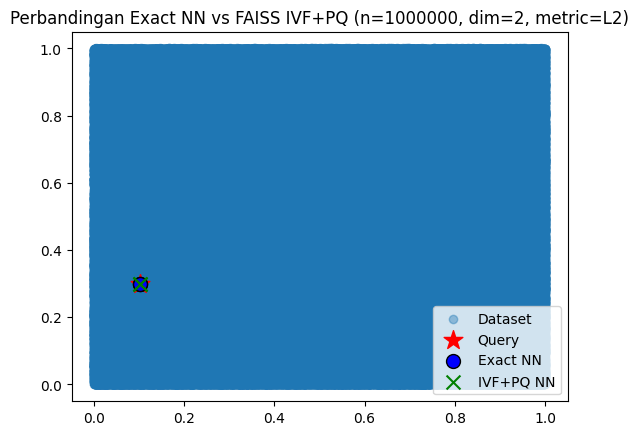


--- Experiment: n_points=1000000, dim=2, metric=IP ---
Exact NN (Flat) indices: [[489250 265642 659640]]
Exact NN distances: [[0.3998675  0.3998152  0.39964792]]
Waktu Exact: 0.00581669807434082
IVF+PQ indices: [[119034 132774 410129]]
IVF+PQ distances: [[1.6437843e-07 2.5378540e-07 2.5378540e-07]]
Waktu IVF+PQ: 0.0013620853424072266


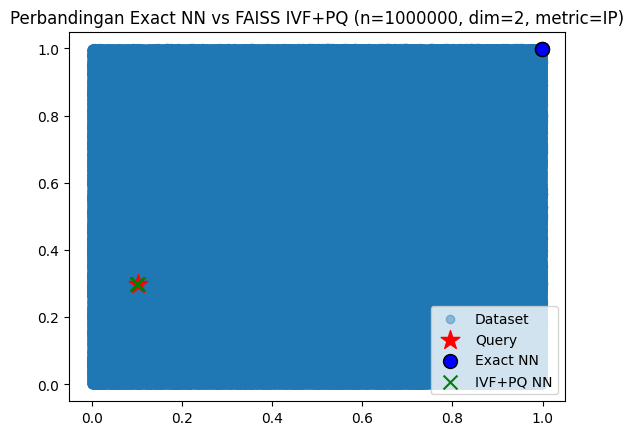


--- Experiment: n_points=1000000, dim=5, metric=L2 ---
Exact NN (Flat) indices: [[901095 495168 561017]]
Exact NN distances: [[0.00151859 0.00221511 0.00223645]]
Waktu Exact: 0.006169795989990234
IVF+PQ indices: [[901095 495168 561017]]
IVF+PQ distances: [[0.00143466 0.00220674 0.00234369]]
Waktu IVF+PQ: 0.0017275810241699219

--- Experiment: n_points=1000000, dim=5, metric=IP ---
Exact NN (Flat) indices: [[958577 238618 509273]]
Exact NN distances: [[2.701954 2.696338 2.681728]]
Waktu Exact: 0.0067980289459228516
IVF+PQ indices: [[901095 495168 561017]]
IVF+PQ distances: [[0.00143466 0.00220674 0.00234369]]
Waktu IVF+PQ: 0.001898050308227539


In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# Function to run FAISS experiment
def run_faiss_experiment(n_points, dim, metric_type):
    np.random.seed(42)
    X = np.random.rand(n_points, dim).astype('float32')
    query = np.random.rand(1, dim).astype('float32')

    print(f"\n--- Experiment: n_points={n_points}, dim={dim}, metric={metric_type} ---")

    # Exact NN with IndexFlat
    if metric_type == 'L2':
        index_flat = faiss.IndexFlatL2(dim)
    elif metric_type == 'IP':
        index_flat = faiss.IndexFlatIP(dim)
    else:
        raise ValueError("Unsupported metric type")

    index_flat.add(X)

    start = time.time()
    D_flat, I_flat = index_flat.search(query, 3)
    end = time.time()
    time_flat = end - start

    print("Exact NN (Flat) indices:", I_flat)
    print("Exact NN distances:", D_flat)
    print("Waktu Exact:", time_flat)

    # IVF + PQ (Approximate)
    nlist = 10 if n_points < 100000 else 100 # Adjust nlist based on dataset size
    m = dim if dim <= 8 else 8 # Subvectors for PQ, max 8
    quantizer = faiss.IndexFlatL2(dim)

    if metric_type == 'L2':
        index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)
    elif metric_type == 'IP':
         index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8) # Note: IVF+PQ uses L2 for clustering regardless of query metric

    index_ivfpq.train(X)
    index_ivfpq.add(X)

    # Set number of probes for IVF search (trade-off speed vs accuracy)
    index_ivfpq.nprobe = 5 if n_points < 100000 else 20

    start = time.time()
    D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
    end = time.time()
    time_ivfpq = end - start

    print("IVF+PQ indices:", I_ivfpq)
    print("IVF+PQ distances:", D_ivfpq)
    print("Waktu IVF+PQ:", time_ivfpq)

    # Visualisasi (only for 2D data)
    if dim == 2:
        plt.figure()
        plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
        plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

        # Tetangga dari Flat
        plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

        # Tetangga dari IVF+PQ
        plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

        plt.legend()
        plt.title(f"Perbandingan Exact NN vs FAISS IVF+PQ (n={n_points}, dim={dim}, metric={metric_type})")
        plt.show()


# Run experiments
# Experiment 1: 1000 points, 2D, L2
run_faiss_experiment(1000, 2, 'L2')

# Experiment 2: 1000 points, 2D, IP
run_faiss_experiment(1000, 2, 'IP')

# Experiment 3: 1000 points, 5D, L2
run_faiss_experiment(1000, 5, 'L2')

# Experiment 4: 1000 points, 5D, IP
run_faiss_experiment(1000, 5, 'IP')

# Experiment 5: 1 million points, 2D, L2
run_faiss_experiment(1000000, 2, 'L2')

# Experiment 6: 1 million points, 2D, IP
run_faiss_experiment(1000000, 2, 'IP')

# Experiment 7: 1 million points, 5D, L2
run_faiss_experiment(1000000, 5, 'L2')

# Experiment 8: 1 million points, 5D, IP
run_faiss_experiment(1000000, 5, 'IP')

## PRAKTIKUM 3

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")


=== Exact NN ===
Indices: [[993 964 788 528  16]]
Distances: [[0.01145547 0.02310762 0.0234505  0.02675764 0.0279675 ]]
Waktu: 0.05717778205871582 detik

=== HNSW ===
Indices: [[993 964 788 528  16]]
Distances: [[0.00013123 0.00053396 0.00054993 0.00071597 0.00078218]]
Waktu: 0.0001513957977294922 detik


In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# Function to run HNSW experiment
def run_hnsw_experiment(n_points, dim, metric_type):
    np.random.seed(42)
    data = np.random.random((n_points, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)
    k = 5

    print(f"\n--- Experiment: n_points={n_points}, dim={dim}, metric={metric_type} ---")

    # Exact NN (Brute Force) - for comparison (only for smaller datasets and supported metrics)
    if n_points <= 10000:
        sklearn_metric = None
        if metric_type == 'l2':
            sklearn_metric = 'euclidean'
        elif metric_type == 'cosine':
            sklearn_metric = 'cosine'

        if sklearn_metric:
            nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=sklearn_metric)
            nn.fit(data)
            start = time.time()
            distances_exact, indices_exact = nn.kneighbors(query)
            end = time.time()
            time_exact = end - start
            print("=== Exact NN ===")
            print("Indices:", indices_exact[0])
            print("Distances:", distances_exact[0])
            print("Waktu:", round(time_exact, 6), "detik")
        else:
            print("=== Exact NN (Brute Force) Skipped: Metric not supported by scikit-learn NearestNeighbors ===")


    # HNSW
    p = hnswlib.Index(space=metric_type, dim=dim)
    p.init_index(max_elements=n_points, ef_construction=100, M=16)
    p.add_items(data)
    p.set_ef(50)

    start = time.time()
    labels_hnsw, distances_hnsw = p.knn_query(query, k=k)
    end = time.time()
    time_hnsw = end - start

    print("\n=== HNSW ===")
    print("Indices:", labels_hnsw[0])
    print("Distances:", distances_hnsw[0])
    print("Waktu:", round(time_hnsw, 6), "detik")


# Run experiments
# HNSW supports 'l2', 'ip', 'cosine'

# Experiment 1: 1000 points, 2D, L2
run_hnsw_experiment(1000, 2, 'l2')

# Experiment 2: 1000 points, 2D, IP
run_hnsw_experiment(1000, 2, 'ip')

# Experiment 3: 1000 points, 5D, L2
run_hnsw_experiment(1000, 5, 'l2')

# Experiment 4: 1000 points, 5D, IP
run_hnsw_experiment(1000, 5, 'ip')


# Experiment 5: 1 million points, 2D, L2
run_hnsw_experiment(1000000, 2, 'l2')

# Experiment 6: 1 million points, 2D, IP
run_hnsw_experiment(1000000, 2, 'ip')

# Experiment 7: 1 million points, 5D, L2
run_hnsw_experiment(1000000, 5, 'l2')

# Experiment 8: 1 million points, 5D, IP
run_hnsw_experiment(1000000, 5, 'ip')

# Experiment 9: 1000 points, 2D, Cosine
run_hnsw_experiment(1000, 2, 'cosine')

# Experiment 10: 1 million points, 5D, Cosine
run_hnsw_experiment(1000000, 5, 'cosine')


--- Experiment: n_points=1000, dim=2, metric=l2 ---
=== Exact NN ===
Indices: [112 535 777 246 763]
Distances: [0.0046002  0.037096   0.04848799 0.06090931 0.06460769]
Waktu: 0.001287 detik

=== HNSW ===
Indices: [112 535 777 246 763]
Distances: [2.1161813e-05 1.3761134e-03 2.3510854e-03 3.7099437e-03 4.1741543e-03]
Waktu: 5.7e-05 detik

--- Experiment: n_points=1000, dim=2, metric=ip ---
=== Exact NN (Brute Force) Skipped: Metric not supported by scikit-learn NearestNeighbors ===

=== HNSW ===
Indices: [249 712 598 977 932]
Distances: [0.50142217 0.5034294  0.5059401  0.5082675  0.5107913 ]
Waktu: 5.2e-05 detik

--- Experiment: n_points=1000, dim=5, metric=l2 ---
=== Exact NN ===
Indices: [988 780  27 943  93]
Distances: [0.10281748 0.15009931 0.20240517 0.22791335 0.24103224]
Waktu: 0.000545 detik

=== HNSW ===
Indices: [988 780  27 943  93]
Distances: [0.01057143 0.0225298  0.04096785 0.05194449 0.05809654]
Waktu: 0.000175 detik

--- Experiment: n_points=1000, dim=5, metric=ip ---


## PRAKTIKUM 4

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Normalize data for cosine similarity (optional but recommended)
# X = X / np.linalg.norm(X, axis=1)[:, np.newaxis]


# Query point
query = np.random.random((1, dim)).astype(np.float32)
# Normalize query for cosine similarity
# query = query / np.linalg.norm(query)

k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy (Euclidean Distance) ===")
ann_index_euclidean = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index_euclidean.add_item(i, X[i])
ann_index_euclidean.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index_euclidean.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors (first 5):", neighbors[0][:5])
print("Distances (first 5):", neighbors[1][:5])

print("\n=== Annoy (Angular Distance) ===")
ann_index_angular = AnnoyIndex(dim, 'angular')

start = time.time()
for i in range(n_data):
    ann_index_angular.add_item(i, X[i])
ann_index_angular.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index_angular.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors (first 5):", neighbors[0][:5])
print("Distances (first 5):", neighbors[1][:5])


# ===============================
# 3. FAISS
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index_l2 = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index_l2.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index_l2.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors (first 5):", indices[0][:5])
print("Distances (first 5):", distances[0][:5])


print("\n=== FAISS (IndexFlatIP) ===")
# For Inner Product (IP), it's often beneficial to normalize the data first
# If your data is not normalized, IP distance can be affected by vector magnitude.
# Uncomment the normalization lines at the beginning if you want to test with normalized data.
faiss_index_ip = faiss.IndexFlatIP(dim)

start = time.time()
faiss_index_ip.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index_ip.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors (first 5):", indices[0][:5])
print("Distances (first 5):", distances[0][:5])


# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib - L2) ===")
hnsw_index_l2 = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index_l2.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index_l2.add_items(X)
build_time = time.time() - start

hnsw_index_l2.set_ef(50)

start = time.time()
labels, distances = hnsw_index_l2.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors (first 5):", labels[0][:5])
print("Distances (first 5):", distances[0][:5])


print("\n=== HNSW (hnswlib - IP) ===")
# For Inner Product (IP), it's often beneficial to normalize the data first
# If your data is not normalized, IP distance can be affected by vector magnitude.
# Uncomment the normalization lines at the beginning if you want to test with normalized data.
hnsw_index_ip = hnswlib.Index(space='ip', dim=dim)

start = time.time()
hnsw_index_ip.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index_ip.add_items(X)
build_time = time.time() - start

hnsw_index_ip.set_ef(50)

start = time.time()
labels, distances = hnsw_index_ip.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors (first 5):", labels[0][:5])
print("Distances (first 5):", distances[0][:5])


print("\n=== HNSW (hnswlib - Cosine) ===")
# For Cosine similarity, data should ideally be normalized to unit vectors.
# Uncomment the normalization lines at the beginning if you want to test with normalized data.
hnsw_index_cosine = hnswlib.Index(space='cosine', dim=dim)

start = time.time()
hnsw_index_cosine.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index_cosine.add_items(X)
build_time = time.time() - start

hnsw_index_cosine.set_ef(50)

start = time.time()
labels, distances = hnsw_index_cosine.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors (first 5):", labels[0][:5])
print("Distances (first 5):", distances[0][:5])

=== Annoy (Euclidean Distance) ===
Build time: 21.892763137817383 detik
Query time: 0.00019550323486328125 detik
Neighbors (first 5): [94543, 683318, 674044, 272414, 528476]
Distances (first 5): [0.05478391796350479, 0.06358018517494202, 0.06655634939670563, 0.06725229322910309, 0.07195629179477692]

=== Annoy (Angular Distance) ===
Build time: 27.20171618461609 detik
Query time: 0.0002951622009277344 detik
Neighbors (first 5): [102506, 428743, 216936, 342878, 140783]
Distances (first 5): [0.030187251046299934, 0.03625230863690376, 0.04427915811538696, 0.04495389387011528, 0.045594390481710434]

=== FAISS (IndexFlatL2) ===
Build time: 0.008498668670654297 detik
Query time: 0.006273746490478516 detik
Neighbors (first 5): [ 94543 683318 674044 272414 528476]
Distances (first 5): [0.00300128 0.00404244 0.00442975 0.00452287 0.00517771]

=== FAISS (IndexFlatIP) ===
Build time: 0.01523900032043457 detik
Query time: 0.006819486618041992 detik
Neighbors (first 5): [480322  13597 501074 137549

## PRAKTIKUM 5

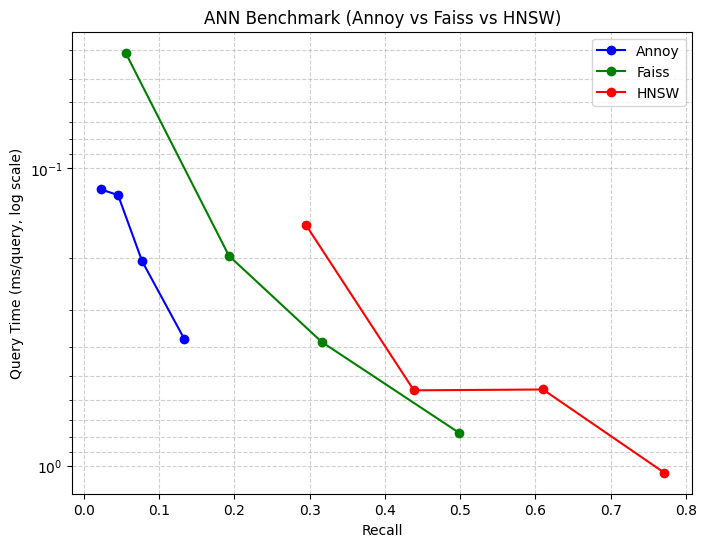

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

## PRAKTIKUM 6

Import & helper

In [ ]:
import os, glob, time, math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

import kagglehub
import faiss
from annoy import AnnoyIndex
import hnswlib

np.random.seed(42)

def recall_at_k(exact_idx, approx_idx):
    # exact_idx, approx_idx shape: (Q, k)
    inter = [len(set(e).intersection(set(a))) for e,a in zip(exact_idx, approx_idx)]
    return np.mean(np.array(inter) / exact_idx.shape[1])

def timeit(fn, *args, **kwargs):
    t0 = time.time()
    out = fn(*args, **kwargs)
    return out, time.time() - t0


Download dataset via kagglehub & load CSV

In [ ]:
path = kagglehub.dataset_download("bwandowando/spotify-songs-with-attributes-and-lyrics")
print("Downloaded to:", path)

# Cari CSV yang paling relevan (fallback ke yang pertama)
csvs = sorted(glob.glob(os.path.join(path, "**/*.csv"), recursive=True))
assert len(csvs) > 0, "CSV file not found in the Kaggle dataset path."

# Prioritaskan nama yang mengandung 'spotify' atau 'songs'
pri = [p for p in csvs if "spotify" in os.path.basename(p).lower() or "song" in os.path.basename(p).lower()]
csv_file = pri[0] if len(pri) else csvs[0]
print("Using CSV:", csv_file)

df = pd.read_csv(csv_file)
print(df.shape)
df.head(3)


100%|██████████| 894M/894M [00:30<00:00, 30.4MB/s]

Extracting files...


Downloaded to: /root/.cache/kagglehub/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/versions/19
Using CSV: /root/.cache/kagglehub/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics/versions/19/songs_with_attributes_and_lyrics.csv
(955320, 17)


,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838,0.471,0.193,100.059,79500.0,"He said he came from Jamaica,\n he owned a cou..."
1,2ASl4wirkeYm3OWZxXKYuq,!!,NaN,Yxngxr1,0.788,0.6480,7,-9.135,0,0.3150,0.90000,0.000,0.176,0.287,79.998,114000.0,"Fucked a bitch, now she running with my kids\n..."
2,69lcggVPmOr9cvPx9kLiiN,!!! - Interlude,Where I Belong EP,['Glowie'],0.000,0.0354,7,-20.151,0,0.0000,0.90800,0.000,0.479,0.000,0.000,11413.0,"Oh, my God, I'm going crazy\n"


Pilih fitur & preprocessing

In [ ]:
# Sesuaikan nama kolom jika berbeda—kode ini akan memfilter yang tersedia saja
candidate_features = [
    'danceability','energy','loudness','speechiness',
    'acousticness','instrumentalness','liveness','valence','tempo'
]
features = [c for c in candidate_features if c in df.columns]
assert len(features) >= 5, f"Tidak cukup fitur ditemukan. Ditemukan: {features}"

X = df[features].astype(np.float32).fillna(0).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).astype(np.float32)

N, D = X_scaled.shape
print(f"N={N:,}, D={D}, features={features}")


N=955,320, D=9, features=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


Parameter eksperimen

In [ ]:
# K neighbor
k = 10

# Jumlah query untuk evaluasi (subset agar cepat). Naikkan kalau mau lebih akurat.
Q = min(2000, N)     # mis. 2000 query acak

# Annoy
N_TREES = 10

# HNSW
M = 16
EF_CONSTRUCTION = 200
EF_QUERY = 200

# FAISS IVF
NLIST = max(32, int(math.sqrt(N)))   # heuristik umum
NPROBE = min(64, max(8, int(NLIST*0.1)))  # 10% nlist


Ambil subset query & ground truth exact (sklearn brute)

In [ ]:
# Pilih Q baris acak untuk dijadikan query
rng = np.random.default_rng(123)
q_idx = rng.choice(N, size=Q, replace=False)
QX = X_scaled[q_idx]

# Exact (sklearn brute)
(nn_fit, t_build_exact) = timeit(
    lambda X: NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean').fit(X),
    X_scaled
)
((dist_exact, idx_exact), t_query_exact) = timeit(nn_fit.kneighbors, QX)

print(f"[Exact] build={t_build_exact:.3f}s, query={t_query_exact:.3f}s, total={t_build_exact+t_query_exact:.3f}s")


[Exact] build=0.024s, query=9.685s, total=9.709s


Annoy (euclidean)

In [ ]:
# Build
f = D
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v.tolist())

_, t_build_annoy = timeit(index_annoy.build, N_TREES)

# Query untuk subset Q
def annoy_batch_query(index, QX, k):
    out = []
    for v in QX:
        out.append(index.get_nns_by_vector(v.tolist(), k))
    return np.array(out, dtype=int)

(idx_annoy, t_query_annoy) = timeit(annoy_batch_query, index_annoy, QX, k)
rec_annoy = recall_at_k(idx_exact, idx_annoy)

print(f"[Annoy] trees={N_TREES} build={t_build_annoy:.3f}s, query={t_query_annoy:.3f}s, recall@{k}={rec_annoy:.3f}")


[Annoy] trees=10 build=14.430s, query=0.093s, recall@10=0.827


HNSW (L2)

In [ ]:
p = hnswlib.Index(space='l2', dim=D)
_, t_build_hnsw_init = timeit(p.init_index, max_elements=N, ef_construction=EF_CONSTRUCTION, M=M)
_, t_build_hnsw_add  = timeit(p.add_items, X_scaled, np.arange(N, dtype=np.int32))
p.set_ef(EF_QUERY)

# Batch query
((idx_hnsw, dist_hnsw), t_query_hnsw) = timeit(p.knn_query, QX, k=k)
rec_hnsw = recall_at_k(idx_exact, idx_hnsw)

print(f"[HNSW] M={M} efC={EF_CONSTRUCTION} efQ={EF_QUERY} "
      f"build={t_build_hnsw_init+t_build_hnsw_add:.3f}s, query={t_query_hnsw:.3f}s, recall@{k}={rec_hnsw:.3f}")


[HNSW] M=16 efC=200 efQ=200 build=173.610s, query=0.416s, recall@10=0.994


FAISS IVF-Flat (L2)

In [ ]:
d = D
quantizer = faiss.IndexFlatL2(d)
index_ivf = faiss.IndexIVFFlat(quantizer, d, NLIST, faiss.METRIC_L2)

# Train + add
_, t_train = timeit(index_ivf.train, X_scaled)
_, t_add   = timeit(index_ivf.add, X_scaled)
index_ivf.nprobe = NPROBE

# Query
((D_ivf, I_ivf), t_query_ivf) = timeit(index_ivf.search, QX, k)
rec_ivf = recall_at_k(idx_exact, I_ivf)

print(f"[FAISS IVF] nlist={NLIST} nprobe={NPROBE} train={t_train:.3f}s add={t_add:.3f}s "
      f"query={t_query_ivf:.3f}s recall@{k}={rec_ivf:.3f}")


[FAISS IVF] nlist=977 nprobe=64 train=1.313s add=0.499s query=0.935s recall@10=0.998


Ringkasan hasil

In [ ]:
summary = pd.DataFrame([
    {"Method":"Exact (sklearn brute)", "Build/Train (s)": round(t_build_exact,3), "Query (s)": round(t_query_exact,3), "Recall@k": 1.000},
    {"Method":f"Annoy (trees={N_TREES})", "Build/Train (s)": round(t_build_annoy,3), "Query (s)": round(t_query_annoy,3), "Recall@k": round(rec_annoy,3)},
    {"Method":f"HNSW (M={M}, efQ={EF_QUERY})", "Build/Train (s)": round(t_build_hnsw_init+t_build_hnsw_add,3), "Query (s)": round(t_query_hnsw,3), "Recall@k": round(rec_hnsw,3)},
    {"Method":f"FAISS IVF (nlist={NLIST}, nprobe={NPROBE})", "Build/Train (s)": round(t_train+t_add,3), "Query (s)": round(t_query_ivf,3), "Recall@k": round(rec_ivf,3)},
])
summary


,Method,Build/Train (s),Query (s),Recall@k
0,Exact (sklearn brute),0.024,9.685,1.000
1,Annoy (trees=10),14.430,0.093,0.827
2,"HNSW (M=16, efQ=200)",173.610,0.416,0.994
3,"FAISS IVF (nlist=977, nprobe=64)",1.813,0.935,0.998


## TUGAS

In [ ]:
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import hnswlib
import faiss
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Contoh dataset kecil untuk testing
# -------------------------------
np.random.seed(42)
n_samples = 10000   # jumlah database vector
d = 128             # dimensi
X = np.random.random((n_samples, d)).astype('float32')

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors

# -------------------------------
# Exact NN (brute-force)
# -------------------------------
start = time.time()
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(X_scaled)
dist_exact, idx_exact = nn.kneighbors(X_scaled)
time_exact = time.time() - start
print(f"Exact NN done in {time_exact:.3f} s")

# -------------------------------
# Annoy
# -------------------------------
start = time.time()
f = X_scaled.shape[1]
index_annoy = AnnoyIndex(f, 'euclidean')
for i, v in enumerate(X_scaled):
    index_annoy.add_item(i, v)
index_annoy.build(10)
idx_annoy = [index_annoy.get_nns_by_vector(v, k) for v in X_scaled]
time_annoy = time.time() - start
print(f"Annoy done in {time_annoy:.3f} s")

# -------------------------------
# HNSW
# -------------------------------
start = time.time()
p_hnsw = hnswlib.Index(space='l2', dim=d)
p_hnsw.init_index(max_elements=n_samples, ef_construction=200, M=16)
p_hnsw.add_items(X_scaled)
p_hnsw.set_ef(200)
idx_hnsw, _ = p_hnsw.knn_query(X_scaled, k=k)
time_hnsw = time.time() - start
print(f"HNSW done in {time_hnsw:.3f} s")

# -------------------------------
# FAISS IVF
# -------------------------------
start = time.time()
quantizer = faiss.IndexFlatL2(d)
index_faiss = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2)
index_faiss.train(X_scaled)
index_faiss.add(X_scaled)
index_faiss.nprobe = 10
_, idx_faiss = index_faiss.search(X_scaled, k)
time_faiss = time.time() - start
print(f"FAISS IVF done in {time_faiss:.3f} s")

# -------------------------------
# Tampilkan ringkasan waktu
# -------------------------------
print("\n=== Ringkasan Waktu (detik) ===")
print(f"Exact NN : {time_exact:.3f}")
print(f"Annoy    : {time_annoy:.3f}")
print(f"HNSW     : {time_hnsw:.3f}")
print(f"FAISS    : {time_faiss:.3f}")

Exact NN done in 1.183 s
Annoy done in 0.574 s
HNSW done in 6.207 s
FAISS IVF done in 0.373 s

=== Ringkasan Waktu (detik) ===
Exact NN : 1.183
Annoy    : 0.574
HNSW     : 6.207
FAISS    : 0.373
